# Project 2 Exercise 2. Adult dataset preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import walk
import re

## 1. Read files

In [2]:
data_path = './data'

In [3]:
for root, dirs, files in walk(data_path):
    all_files = [data_path+'/'+file for file in files if file.split('.')[-1] in ['data', 'names']]

for file_num in range(len(all_files)):
    print(f'#{file_num} ->', all_files[file_num])

#0 -> ./data/adult.names
#1 -> ./data/adult.data
#2 -> ./data/old.adult.names


In [4]:
# in here we choose the index from above result. for example here we want data file with index 2
# and data names file with index 3

names_index = 0
data_index = 1


# open names file
names_file = [line.strip() for line in open(all_files[names_index], 'r').readlines()]

print_flag = False
attrs = []
for line in names_file:
    if len(line) > 0 and line[0] != '|':
        print_flag = True
    
    if print_flag:
        print(line)
        attr = re.findall("([\w\-]*)\(*\)*:", line)
        
        if len(attr) > 0:
            print(attr)
            attrs.append(attr[0])


attrs.append('income')        

# print all attributes
print('attributes count: ', len(attrs), '\n'*2)
print(attrs)

>50K, <=50K.

age: continuous.
['age']
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
['workclass']
fnlwgt: continuous.
['fnlwgt']
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
['education']
education-num: continuous.
['education-num']
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
['marital-status']
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
['occupation']
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
['relationship']
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
['race']
sex: Female, Male.


In [5]:
data_df = pd.read_csv(all_files[data_index])
data_df.columns = attrs
data_df = data_df.replace('?', np.NaN)
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2. Columns and Rows counts

In [6]:
print('Columns counts: ',len(data_df.columns))
print('Row counts: ', len(data_df))

Columns counts:  15
Row counts:  32560


## 3 & 4 . Miss values count

In [7]:
pd.DataFrame(data_df.isna().any())

,0
age,False
workclass,False
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,False
relationship,False
race,False
sex,False


## 5. Fill missing values by imputing them

In [8]:
cols_with_missing = [col for col in data_df.columns if data_df[col].isnull().any()]
print('Columns with missing values: ', cols_with_missing)

# for missing values we can use simple imputer to fill missing values...
# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer()
# imputed_data_df = pd.DataFrame(my_imputer.fit_transform(data_df))
# imputed_data_df.columns = data_df.columns
# data_df = imputed_data_df

# Actually!!! ther is an easier way to handle missing values...
# we can just simply DROP them! :)))

data_df = data_df.drop(cols_with_missing, axis=1)
data_df


Columns with missing values:  []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 6. Graph of each values of each column

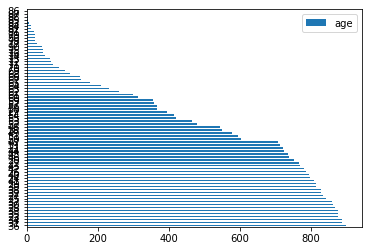

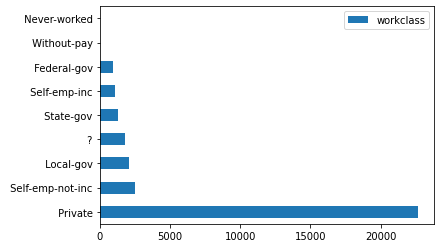

In [ ]:
for col in data_df.columns:
        each_value_count = pd.DataFrame(data_df[col].value_counts())
        each_value_count.plot.barh()

## 7. Draw class value counts

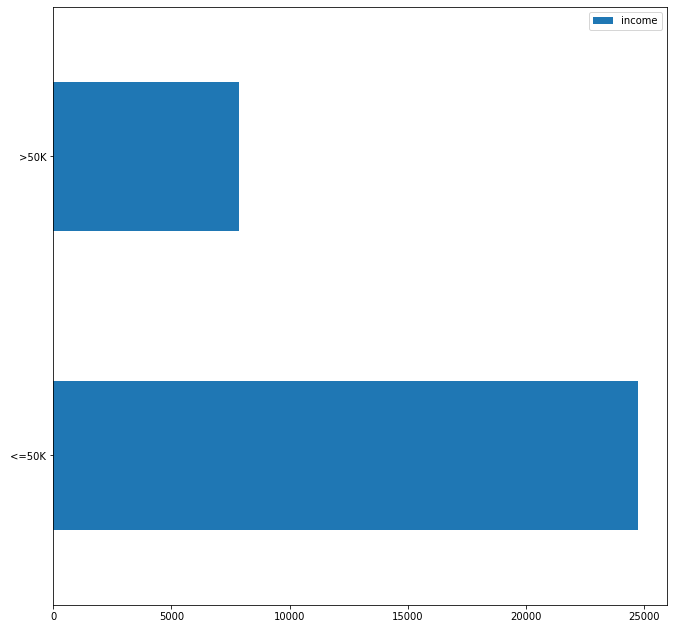

In [10]:
value_count = pd.DataFrame(data_df['income'].value_counts())
value_count.plot.barh(figsize=(11,11))